# Задача 1

In [ ]:
SELECT
    COUNT(flights.flight_id) AS flights_amount,
    aircrafts.model AS model
FROM
    flights
    RIGHT JOIN aircrafts ON aircrafts.aircraft_code = flights.aircraft_code
WHERE
    flights.departure_time::date BETWEEN '2018-09-01'
    AND '2018-09-30'
GROUP BY
    model

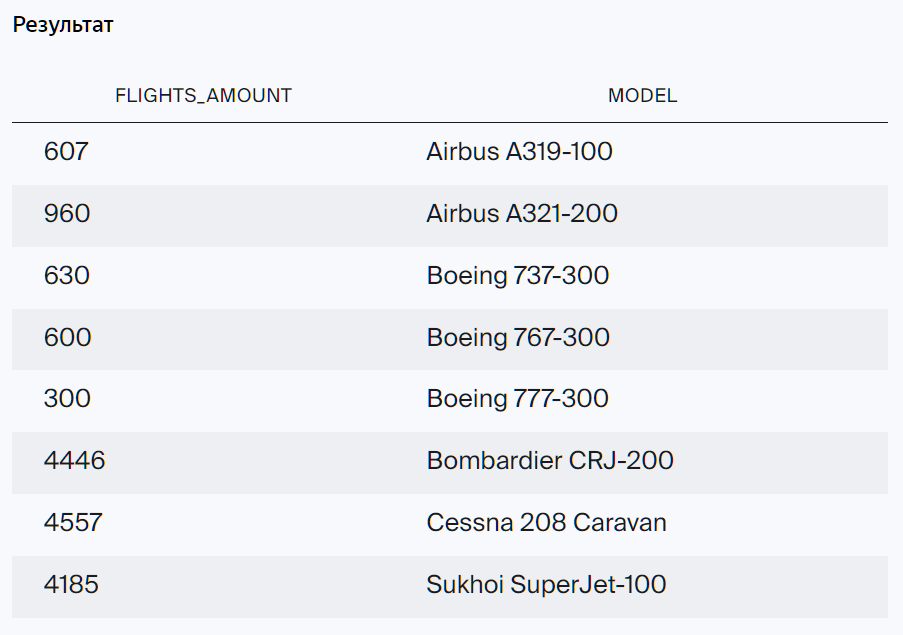

# Задача 2

In [ ]:
SELECT
    COUNT(flights.flight_id) AS flight_id,
    CASE WHEN aircrafts.model LIKE '%Boeing%' THEN
        'Boeing'
    WHEN aircrafts.model LIKE '%Airbus%' THEN
        'Airbus'
    ELSE
        'other'
    END AS flights_amount
FROM
    aircrafts
    INNER JOIN flights ON flights.aircraft_code = aircrafts.aircraft_code
WHERE
    flights.departure_time::date BETWEEN '2018-09-01'
    AND '2018-09-30'
GROUP BY
    flights_amount

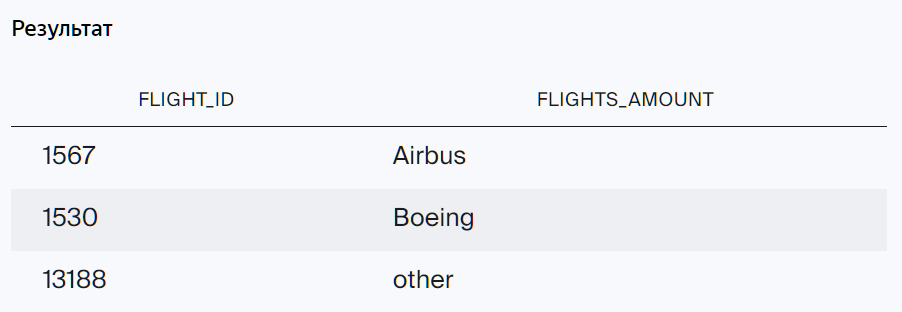

# Задача 3

In [ ]:
SELECT
    city,
    AVG(CHMO.average_flights) AS average_flights
FROM
    (SELECT
        airports.city AS city,
        COUNT(flights.flight_id) AS average_flights
    FROM
        airports
        INNER JOIN flights ON flights.arrival_airport=airports.airport_code
    WHERE
        flights.arrival_time::date BETWEEN '2018-08-01'
        AND '2018-08-31'
    GROUP BY
        city,
        EXTRACT(DAY FROM flights.arrival_time::date)) AS CHMO
GROUP BY
    city;

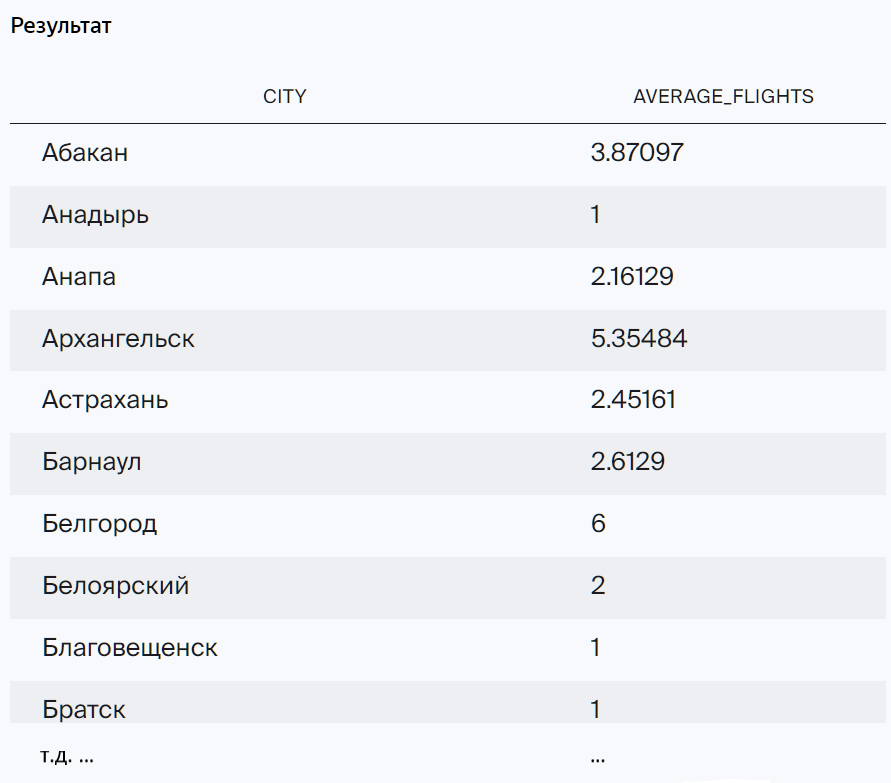

# Задача 4

In [ ]:
SELECT
    FESTIVAL_NAME AS festival_name,
    EXTRACT(week FROM FESTIVAL_DATE::date) AS festival_week
FROM
    festivals
WHERE
    FESTIVAL_DATE::date BETWEEN '2018-07-23'
    AND '2018-09-30'
    AND festival_city = 'Москва'

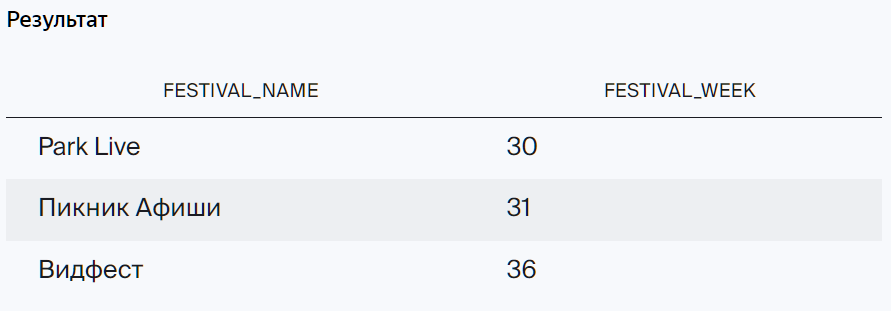

# Задача 5

In [ ]:
SELECT
    *
FROM
    (SELECT
        EXTRACT(WEEK FROM flights.arrival_time::date) AS week_number,
        COUNT(ticket_flights.ticket_no) AS ticket_amount
    FROM
        ticket_flights
        LEFT JOIN flights ON flights.flight_id = ticket_flights.flight_id
        LEFT JOIN airports ON airports.airport_code = flights.arrival_airport
    WHERE
        flights.arrival_time::date BETWEEN '2018-07-23'
        AND '2018-09-30'
        AND airports.city = 'Москва'
    GROUP BY
        week_number) AS TABLE1
    LEFT JOIN 
        (SELECT
            FESTIVAL_NAME AS festival_name,
            EXTRACT(week FROM FESTIVAL_DATE::date) AS festival_week
        FROM
            festivals
        WHERE
            FESTIVAL_DATE::date BETWEEN '2018-07-23'
            AND '2018-09-30'
            AND festival_city = 'Москва') AS TABLE2 ON TABLE2.festival_week = TABLE1.week_number

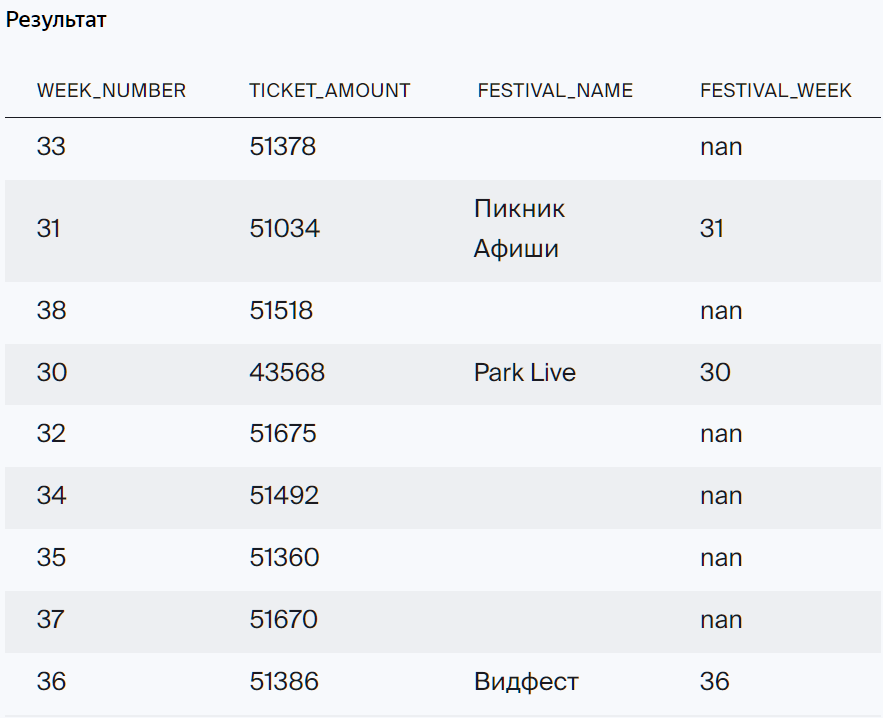